# Mini Project 1- Stock Prediction using Python

<h3>Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on an exchange. The successful prediction of a stock's future price could yield significant profit.</h3>

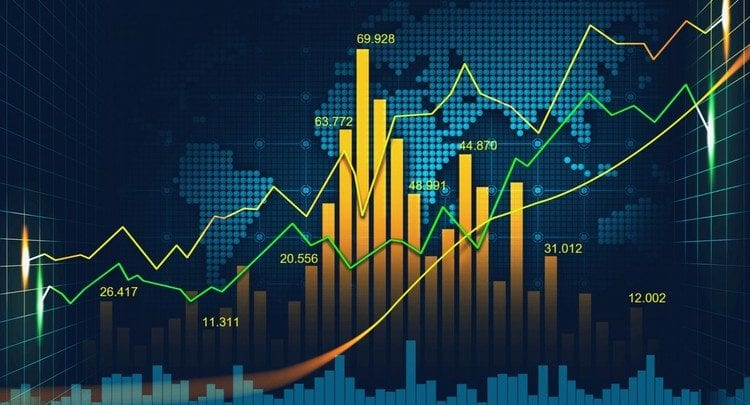

<h2>Objective:

<h3>To use Python libraries such as Pandas, Seaborn, and Matplotlib to extract and analyze the information, visualize it, and look at different ways to analyze the risk of a stock, based on its performance history.

<h2> Importing the Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install yfinance
import yfinance as yf

<h3>The stocks we have chosen are from various industries and market caps namely,<br>
<ul>
  <li>Apple</li>
  <li>Google</li>
  <li>Microsoft</li>
  <li>Amazon</li>
</ul>

<h2>Apple

<h4>1.Read the Data from Yahoo finance

In [76]:
aapl=yf.Ticker("AAPL")
apple=aapl.history(start="2020-01-03", end='2022-08-17')

In [77]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,72.675278,73.744902,72.417689,73.683571,135480400,0.0,0.0
2020-01-03,72.898518,73.739983,72.739058,72.967209,146322800,0.0,0.0
2020-01-06,72.074220,73.587875,71.819079,73.548622,118387200,0.0,0.0
2020-01-07,73.558438,73.818483,72.979473,73.202721,108872000,0.0,0.0
2020-01-08,72.900981,74.686952,72.900981,74.380295,132079200,0.0,0.0
...,...,...,...,...,...,...,...
2022-08-10,167.679993,169.339996,166.899994,169.240005,70170500,0.0,0.0
2022-08-11,170.059998,170.990005,168.190002,168.490005,57149200,0.0,0.0
2022-08-12,169.820007,172.169998,169.399994,172.100006,67946400,0.0,0.0


<h4>2.Perform cleaning

In [78]:
apple.groupby('Dividends').count()

,Open,High,Low,Close,Volume,Stock Splits
Dividends,,,,,,
0.0000,650,650,650,650,650,650
0.1925,1,1,1,1,1,1
0.2050,4,4,4,4,4,4
0.2200,4,4,4,4,4,4
0.2300,2,2,2,2,2,2


In [79]:
apple.groupby('Stock Splits').count()

,Open,High,Low,Close,Volume,Dividends
Stock Splits,,,,,,
0.0,660,660,660,660,660,660
4.0,1,1,1,1,1,1


In [80]:
#As most of the records in last two columns are valued as 0.0 we will drop them

In [81]:
apple=apple.drop(['Dividends','Stock Splits'],axis=1)

In [82]:
apple.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [83]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 661 entries, 2020-01-02 to 2022-08-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    661 non-null    float64
 1   High    661 non-null    float64
 2   Low     661 non-null    float64
 3   Close   661 non-null    float64
 4   Volume  661 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 31.0 KB


<h4>3.What was the change in stock price over time?

In [120]:
Change_in_stock = apple['Close'].diff().abs().sort_values(ascending=False)
Change_in_stock.dropna(inplace=True)
Change_in_stock

Date
2022-01-28    11.064240
2020-09-03    10.394531
2020-07-31     9.931992
2022-05-05     9.223618
2020-03-16     8.793674
                ...    
2021-11-15     0.009949
2021-06-07     0.009926
2020-10-26     0.009865
2022-06-27     0.000000
2020-07-02     0.000000
Name: Close, Length: 629, dtype: float64

<h4>4.Visualize the change in a stock’s volume being traded, over time?

<AxesSubplot:xlabel='Date'>

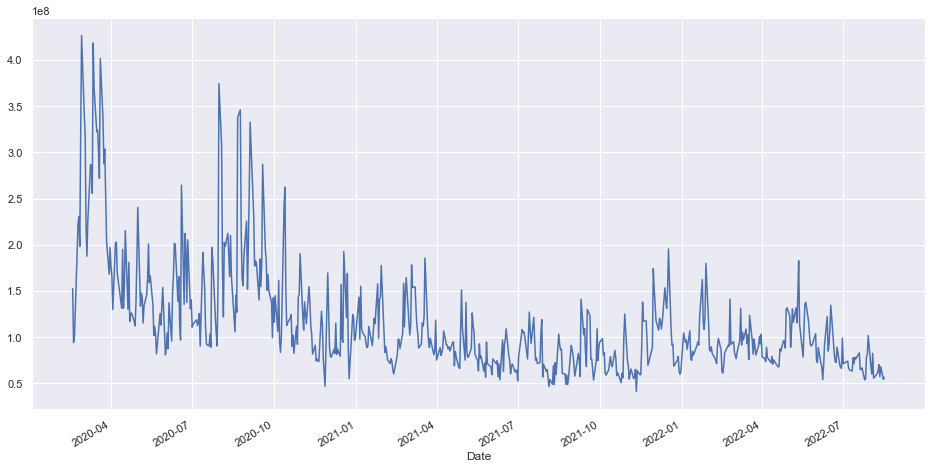

In [122]:
apple['Volume'].plot(figsize=(16,8))

<h4>5.What was the moving average of various stocks?

In [123]:
apple['Moving Avg']=apple['Close'].rolling(30).mean()
apple.dropna(inplace=True)

In [124]:
apple

,Open,High,Low,Close,Volume,Moving Avg,Trend
Date,,,,,,,
2020-03-30,61.658943,62.834382,61.329424,62.659786,167976400,67.388928,0.028538
2020-03-31,62.854064,64.548366,61.968794,62.531921,197002000,66.858505,-0.002041
2020-04-01,60.616301,61.162217,58.803961,59.241676,176218400,66.180537,-0.052617
2020-04-02,59.101501,60.284317,58.255577,60.230217,165934000,65.562734,0.016687
2020-04-03,59.706436,60.419567,58.764608,59.364624,129880000,64.975506,-0.014371
...,...,...,...,...,...,...,...
2022-08-10,167.679993,169.339996,166.899994,169.240005,70170500,152.725285,0.026195
2022-08-11,170.059998,170.990005,168.190002,168.490005,57149200,153.707057,-0.004432
2022-08-12,169.820007,172.169998,169.399994,172.100006,67946400,154.892712,0.021426


<AxesSubplot:xlabel='Date'>

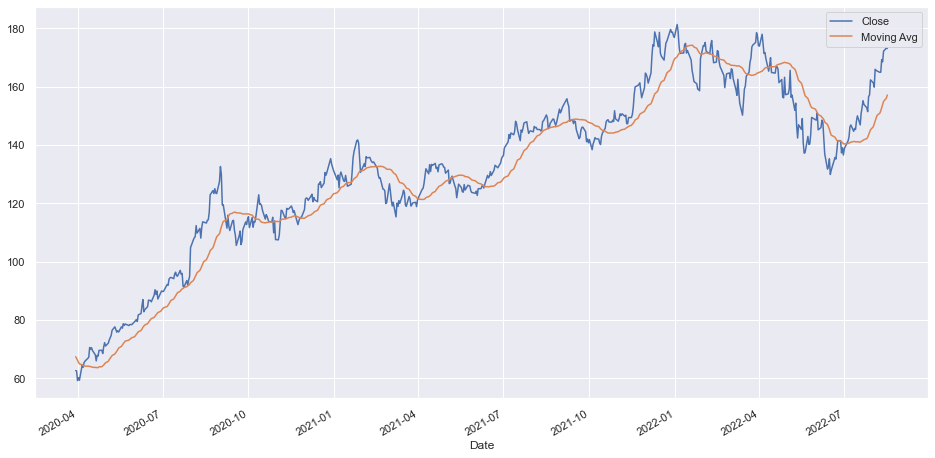

In [125]:
apple[["Close","Moving Avg"]].plot(figsize=(16,8))

<h4>6.What was the daily return average of a stock?

In [126]:
apple_daily_return_avg=apple['Close'].pct_change().mean()
apple_daily_return_avg

0.0018989732278444544

<h4>7.Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [171]:
apple['Day_pct_change']=apple['Close'].pct_change()*100
apple.dropna(inplace=True)
apple

,Open,High,Low,Close,Volume,Moving Avg,Day_pct_change
Date,,,,,,,
2020-04-07,66.591855,66.813178,63.690145,63.795883,202887200,64.447952,-1.158214
2020-04-08,64.609826,65.748381,64.238510,65.428703,168895200,64.230077,2.559444
2020-04-09,66.075448,66.412341,65.091817,65.900848,161834800,64.184748,0.721618
2020-04-13,65.979550,67.304997,65.369696,67.194336,131022800,64.183846,1.962778
2020-04-14,68.854205,70.882945,68.374682,70.587852,194994800,64.087450,5.050301
...,...,...,...,...,...,...,...
2022-08-10,167.679993,169.339996,166.899994,169.240005,70170500,152.725285,2.619456
2022-08-11,170.059998,170.990005,168.190002,168.490005,57149200,153.707057,-0.443158
2022-08-12,169.820007,172.169998,169.399994,172.100006,67946400,154.892712,2.142561


<h4>8.Visualize trend frequency through a Pie Chart.

In [172]:
def trend(x):
      if x > -0.5 and x <= 0.5:
        return "Slight or No change"
      elif x > 0.5 and x <= 1:
        return "Slight Positive"
      elif x > -1 and x <= -0.5:
        return "Slight Negative"
      elif x > 1 and x <= 3:
        return "Positive"
      elif x > -3 and x <= -1:
        return "Negative"
      elif x > 3 and x <= 7:
        return "Among top gainers"
      elif x > -7 and x <= -3:
        return "Among top losers"
      elif x > 7:
        return "Bull run"
      elif x <= -7:
        return "Bear drop"
#A bull run is a market that is on the rise and where the economy is sound; 
#while a bear drop exists in an economy that is receding, where most stocks are declining in value.
apple["Trend"]= np.zeros(apple["Day_pct_change"].count())
apple["Trend"]= apple["Day_pct_change"].apply(lambda x:trend(x))
apple

,Open,High,Low,Close,Volume,Moving Avg,Day_pct_change,Trend
Date,,,,,,,,
2020-04-07,66.591855,66.813178,63.690145,63.795883,202887200,64.447952,-1.158214,Negative
2020-04-08,64.609826,65.748381,64.238510,65.428703,168895200,64.230077,2.559444,Positive
2020-04-09,66.075448,66.412341,65.091817,65.900848,161834800,64.184748,0.721618,Slight Positive
2020-04-13,65.979550,67.304997,65.369696,67.194336,131022800,64.183846,1.962778,Positive
2020-04-14,68.854205,70.882945,68.374682,70.587852,194994800,64.087450,5.050301,Among top gainers
...,...,...,...,...,...,...,...,...
2022-08-10,167.679993,169.339996,166.899994,169.240005,70170500,152.725285,2.619456,Positive
2022-08-11,170.059998,170.990005,168.190002,168.490005,57149200,153.707057,-0.443158,Slight or No change
2022-08-12,169.820007,172.169998,169.399994,172.100006,67946400,154.892712,2.142561,Positive


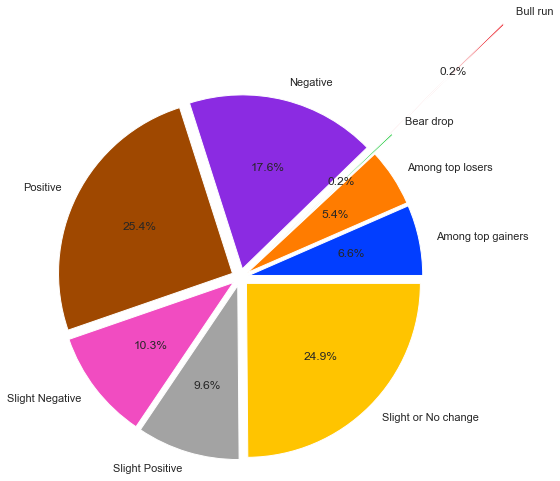

In [184]:
pie_data = apple.groupby('Trend')
pie_label = sorted([i for i in apple.loc[:, 'Trend'].unique()])
color=sns.color_palette('bright')
plt.pie(pie_data['Day_pct_change'].count(), labels = pie_label,colors=color,
        autopct = '%1.1f%%', explode=(0.1,0.1,0.4,2.2,0.1,0.1,0.1,0.1,0.1),radius = 2)
plt.show()

<h2>Google

<h4>1.Read the Data from Yahoo finance

In [196]:
goog=yf.Ticker("GOOG")
google=goog.history(start="2020-01-03", end='2022-08-17')
google

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,67.077499,68.406998,67.077499,68.368500,28132000,0,0.0
2020-01-03,67.392998,68.625000,67.277199,68.032997,23728000,0,0.0
2020-01-06,67.500000,69.824997,67.500000,69.710503,34646000,0,0.0
2020-01-07,69.897003,70.149498,69.518997,69.667000,30054000,0,0.0
2020-01-08,69.603996,70.579002,69.542000,70.216003,30560000,0,0.0
...,...,...,...,...,...,...,...
2022-08-10,119.589996,121.779999,119.360001,120.650002,20497000,0,0.0
2022-08-11,122.080002,122.339996,119.550003,119.820000,16671600,0,0.0
2022-08-12,121.160004,122.650002,120.400002,122.650002,16106600,0,0.0


<h4>2.Perform cleaning

In [197]:
google.groupby('Dividends').count()

,Open,High,Low,Close,Volume,Stock Splits
Dividends,,,,,,
0,661,661,661,661,661,661


In [198]:
google.isna().any()

Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
dtype: bool

In [199]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 661 entries, 2020-01-02 to 2022-08-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          661 non-null    float64
 1   High          661 non-null    float64
 2   Low           661 non-null    float64
 3   Close         661 non-null    float64
 4   Volume        661 non-null    int64  
 5   Dividends     661 non-null    int64  
 6   Stock Splits  661 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 41.3 KB


<h4>3.What was the change in stock price over time?

In [200]:
Change_in_stock_goog = google['Close'].diff().abs().sort_values(ascending=False)
Change_in_stock_goog.dropna(inplace=True)
Change_in_stock_goog

Date
2022-02-02    10.158005
2022-07-27     8.159996
2021-02-03     7.127998
2020-03-16     6.770000
2022-01-05     6.763000
                ...    
2021-11-17     0.014008
2020-09-30     0.013504
2022-06-08     0.008499
2021-08-31     0.007492
2020-02-11     0.005501
Name: Close, Length: 660, dtype: float64

<h4>4.Visualize the change in a stock’s volume being traded, over time?

<AxesSubplot:xlabel='Date'>

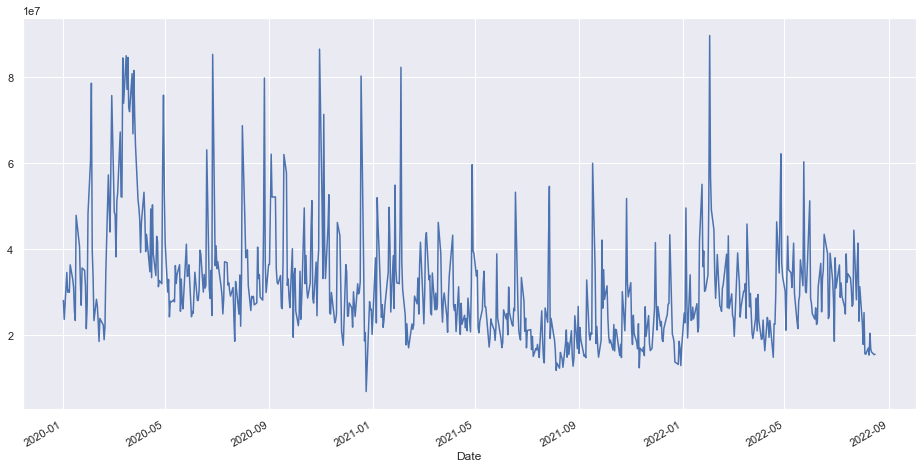

In [201]:
google['Volume'].plot(figsize=(16,8))

<h4>5.What was the moving average of various stocks?

In [202]:
google['Moving Avg']=google['Close'].rolling(30).mean()
google.dropna(inplace=True)
google

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moving Avg
Date,,,,,,,,
2020-02-13,75.634499,76.359001,75.230003,75.733002,18590000,0,0.0,72.594717
2020-02-14,75.779999,76.037003,75.366997,76.037003,23956000,0,0.0,72.850334
2020-02-18,75.750000,76.581497,75.629501,75.983498,22414000,0,0.0,73.115350
2020-02-19,76.253502,76.605301,76.070000,76.334503,18986000,0,0.0,73.336150
2020-02-20,76.099998,76.482002,75.341003,75.907501,21932000,0,0.0,73.544167
...,...,...,...,...,...,...,...,...
2022-08-10,119.589996,121.779999,119.360001,120.650002,20497000,0,0.0,114.390034
2022-08-11,122.080002,122.339996,119.550003,119.820000,16671600,0,0.0,114.642150
2022-08-12,121.160004,122.650002,120.400002,122.650002,16106600,0,0.0,115.084734


<AxesSubplot:xlabel='Date'>

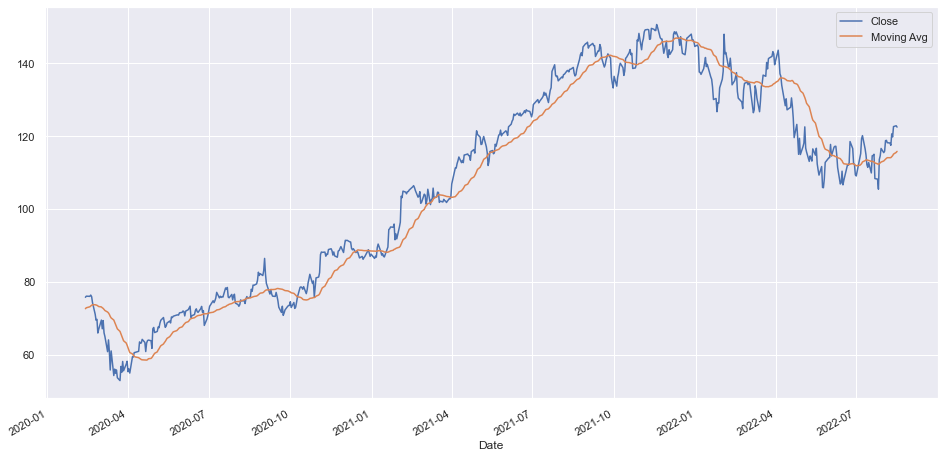

In [203]:
google[["Close","Moving Avg"]].plot(figsize=(16,8))

<h4>6.What was the daily return average of a stock?

In [204]:
google_daily_return_avg=google['Close'].pct_change().mean()
google_daily_return_avg

0.0009914536130680716

<h4>7.Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [205]:
google['Day_pct_change']=google['Close'].pct_change()*100
google.dropna(inplace=True)
google

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moving Avg,Day_pct_change
Date,,,,,,,,,
2020-02-14,75.779999,76.037003,75.366997,76.037003,23956000,0,0.0,72.850334,0.401411
2020-02-18,75.750000,76.581497,75.629501,75.983498,22414000,0,0.0,73.115350,-0.070367
2020-02-19,76.253502,76.605301,76.070000,76.334503,18986000,0,0.0,73.336150,0.461950
2020-02-20,76.099998,76.482002,75.341003,75.907501,21932000,0,0.0,73.544167,-0.559383
2020-02-21,75.401497,75.610748,74.022003,74.255501,34634000,0,0.0,73.678817,-2.176334
...,...,...,...,...,...,...,...,...,...
2022-08-10,119.589996,121.779999,119.360001,120.650002,20497000,0,0.0,114.390034,2.680852
2022-08-11,122.080002,122.339996,119.550003,119.820000,16671600,0,0.0,114.642150,-0.687942
2022-08-12,121.160004,122.650002,120.400002,122.650002,16106600,0,0.0,115.084734,2.361878


In [206]:
google["Trend"]= np.zeros(google["Day_pct_change"].count())
google["Trend"]= google["Day_pct_change"].apply(lambda x:trend(x))
google

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moving Avg,Day_pct_change,Trend
Date,,,,,,,,,,
2020-02-14,75.779999,76.037003,75.366997,76.037003,23956000,0,0.0,72.850334,0.401411,Slight or No change
2020-02-18,75.750000,76.581497,75.629501,75.983498,22414000,0,0.0,73.115350,-0.070367,Slight or No change
2020-02-19,76.253502,76.605301,76.070000,76.334503,18986000,0,0.0,73.336150,0.461950,Slight or No change
2020-02-20,76.099998,76.482002,75.341003,75.907501,21932000,0,0.0,73.544167,-0.559383,Slight Negative
2020-02-21,75.401497,75.610748,74.022003,74.255501,34634000,0,0.0,73.678817,-2.176334,Negative
...,...,...,...,...,...,...,...,...,...,...
2022-08-10,119.589996,121.779999,119.360001,120.650002,20497000,0,0.0,114.390034,2.680852,Positive
2022-08-11,122.080002,122.339996,119.550003,119.820000,16671600,0,0.0,114.642150,-0.687942,Slight Negative
2022-08-12,121.160004,122.650002,120.400002,122.650002,16106600,0,0.0,115.084734,2.361878,Positive


<h4>8.Visualize trend frequency through a Pie Chart.

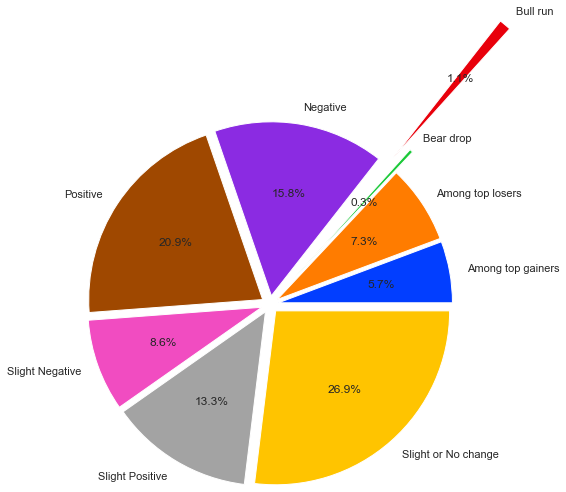

In [207]:
pie_data_goog = google.groupby('Trend')
pie_label_goog = sorted([i for i in google.loc[:, 'Trend'].unique()])
color=sns.color_palette('bright')
plt.pie(pie_data_goog['Day_pct_change'].count(), labels = pie_label_goog,colors=color,
        autopct = '%1.1f%%', explode=(0.1,0.1,0.4,2.2,0.1,0.1,0.1,0.1,0.1),radius = 2)
plt.show()

<h2>Microsoft

<h4>1.Read the Data from Yahoo finance

In [210]:
msft=yf.Ticker("MSFT")
microsoft=msft.history(start="2020-01-03", end='2022-08-17')
microsoft

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,154.798157,156.699253,154.359445,156.592010,22622100,0.0,0
2020-01-03,154.349701,155.938815,154.096212,154.642166,21116200,0.0,0
2020-01-06,153.140790,155.110137,152.585077,155.041885,20813700,0.0,0
2020-01-07,155.324589,155.665803,153.374745,153.628220,21634100,0.0,0
2020-01-08,154.944374,156.767488,153.988954,156.075287,27746500,0.0,0
...,...,...,...,...,...,...,...
2022-08-10,287.559623,289.196133,286.332217,288.547516,24687800,0.0,0
2022-08-11,290.233953,290.593176,285.903149,286.412048,20065900,0.0,0
2022-08-12,287.868990,291.291718,286.332243,291.291718,22601900,0.0,0


<h4>2.Perform cleaning

In [211]:
microsoft.groupby('Dividends').count()

,Open,High,Low,Close,Volume,Stock Splits
Dividends,,,,,,
0.00,651,651,651,651,651,651
0.51,3,3,3,3,3,3
0.56,4,4,4,4,4,4
0.62,3,3,3,3,3,3


In [212]:
microsoft.isna().any()

Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
dtype: bool

In [213]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 661 entries, 2020-01-02 to 2022-08-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          661 non-null    float64
 1   High          661 non-null    float64
 2   Low           661 non-null    float64
 3   Close         661 non-null    float64
 4   Volume        661 non-null    int64  
 5   Dividends     661 non-null    float64
 6   Stock Splits  661 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 41.3 KB


<h4>3.What was the change in stock price over time?

In [214]:
Change_in_stock_msft = microsoft['Close'].diff().abs().sort_values(ascending=False)
Change_in_stock_msft.dropna(inplace=True)
Change_in_stock_msft

Date
2020-03-16    22.885254
2020-03-13    19.326889
2022-07-27    16.804337
2022-02-24    14.256439
2020-03-12    14.243454
                ...    
2021-09-03     0.009888
2020-11-25     0.009872
2020-04-09     0.009781
2020-10-16     0.000000
2021-10-08     0.000000
Name: Close, Length: 660, dtype: float64

<h4>4.Visualize the change in a stock’s volume being traded, over time?

<AxesSubplot:xlabel='Date'>

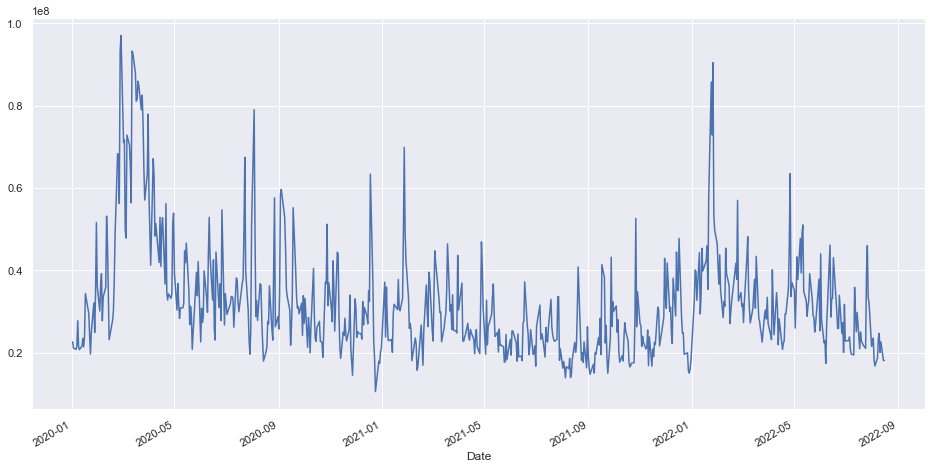

In [215]:
microsoft['Volume'].plot(figsize=(16,8))

<h4>5.What was the moving average of various stocks?

In [216]:
microsoft['Moving Avg']=microsoft['Close'].rolling(30).mean()
microsoft.dropna(inplace=True)
microsoft

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moving Avg
Date,,,,,,,,
2020-02-13,178.488745,181.559744,178.284005,179.102951,35295800,0.00,0,165.329257
2020-02-14,178.654501,180.760336,178.069541,180.701843,23149500,0.00,0,166.132918
2020-02-18,180.955329,182.992913,180.848087,182.534698,27792200,0.00,0,167.062669
2020-02-19,183.844638,183.961943,182.290281,183.082123,29997500,0.51,0,167.997343
2020-02-20,182.759544,183.052823,177.040680,180.286255,36862400,0.00,0,168.885945
...,...,...,...,...,...,...,...,...
2022-08-10,287.559623,289.196133,286.332217,288.547516,24687800,0.00,0,266.600775
2022-08-11,290.233953,290.593176,285.903149,286.412048,20065900,0.00,0,267.490885
2022-08-12,287.868990,291.291718,286.332243,291.291718,22601900,0.00,0,268.657743


<AxesSubplot:xlabel='Date'>

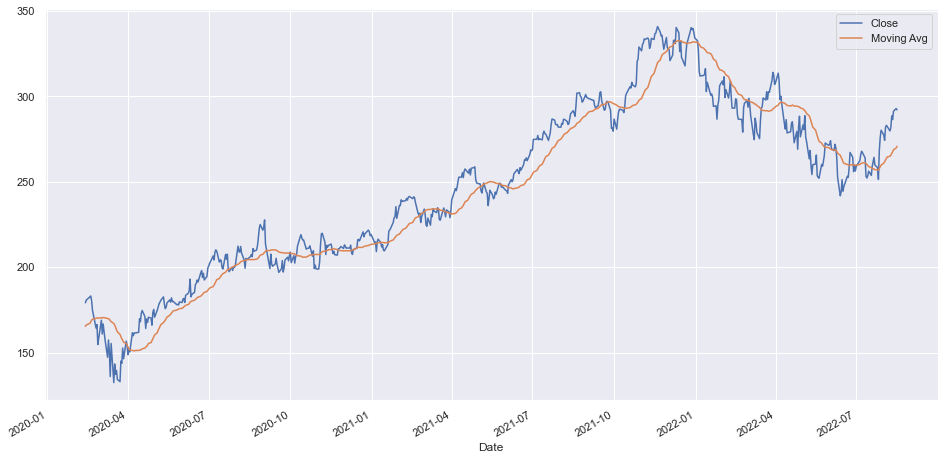

In [217]:
microsoft[["Close","Moving Avg"]].plot(figsize=(16,8))

<h4>6.What was the daily return average of a stock?

In [218]:
microsoft_daily_return_avg=microsoft['Close'].pct_change().mean()
microsoft_daily_return_avg

0.001016657665824524

<h4>7.Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [219]:
microsoft['Day_pct_change']=microsoft['Close'].pct_change()*100
microsoft.dropna(inplace=True)
microsoft

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moving Avg,Day_pct_change
Date,,,,,,,,,
2020-02-14,178.654501,180.760336,178.069541,180.701843,23149500,0.00,0,166.132918,0.892722
2020-02-18,180.955329,182.992913,180.848087,182.534698,27792200,0.00,0,167.062669,1.014298
2020-02-19,183.844638,183.961943,182.290281,183.082123,29997500,0.51,0,167.997343,0.299902
2020-02-20,182.759544,183.052823,177.040680,180.286255,36862400,0.00,0,168.885945,-1.527111
2020-02-21,179.064255,179.386860,173.276954,174.586914,48572600,0.00,0,169.502999,-3.161273
...,...,...,...,...,...,...,...,...,...
2022-08-10,287.559623,289.196133,286.332217,288.547516,24687800,0.00,0,266.600775,2.430035
2022-08-11,290.233953,290.593176,285.903149,286.412048,20065900,0.00,0,267.490885,-0.740075
2022-08-12,287.868990,291.291718,286.332243,291.291718,22601900,0.00,0,268.657743,1.703723


In [220]:
microsoft["Trend"]= np.zeros(microsoft["Day_pct_change"].count())
microsoft["Trend"]= microsoft["Day_pct_change"].apply(lambda x:trend(x))
microsoft

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moving Avg,Day_pct_change,Trend
Date,,,,,,,,,,
2020-02-14,178.654501,180.760336,178.069541,180.701843,23149500,0.00,0,166.132918,0.892722,Slight Positive
2020-02-18,180.955329,182.992913,180.848087,182.534698,27792200,0.00,0,167.062669,1.014298,Positive
2020-02-19,183.844638,183.961943,182.290281,183.082123,29997500,0.51,0,167.997343,0.299902,Slight or No change
2020-02-20,182.759544,183.052823,177.040680,180.286255,36862400,0.00,0,168.885945,-1.527111,Negative
2020-02-21,179.064255,179.386860,173.276954,174.586914,48572600,0.00,0,169.502999,-3.161273,Among top losers
...,...,...,...,...,...,...,...,...,...,...
2022-08-10,287.559623,289.196133,286.332217,288.547516,24687800,0.00,0,266.600775,2.430035,Positive
2022-08-11,290.233953,290.593176,285.903149,286.412048,20065900,0.00,0,267.490885,-0.740075,Slight Negative
2022-08-12,287.868990,291.291718,286.332243,291.291718,22601900,0.00,0,268.657743,1.703723,Positive


<h4>8.Visualize trend frequency through a Pie Chart.

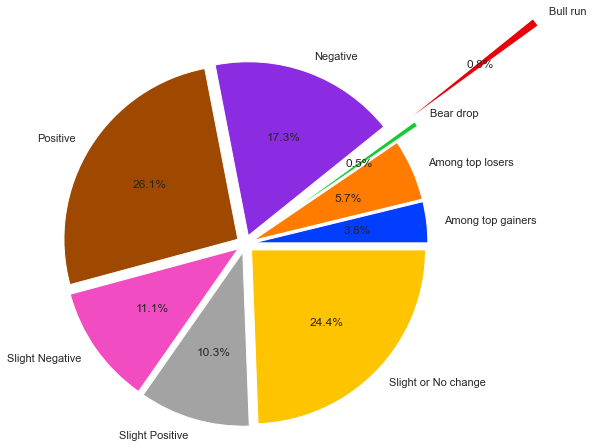

In [221]:
pie_data_msft = microsoft.groupby('Trend')
pie_label_msft = sorted([i for i in microsoft.loc[:, 'Trend'].unique()])
color=sns.color_palette('bright')
plt.pie(pie_data_msft['Day_pct_change'].count(), labels = pie_label_msft,colors=color,
        autopct = '%1.1f%%', explode=(0.1,0.1,0.4,2.2,0.1,0.1,0.1,0.1,0.1),radius = 2)
plt.show()

<h2>Amazon

<h4>1.Read the Data from Yahoo finance

In [222]:
amzn=yf.Ticker("AMZN")
amazon=amzn.history(start="2020-01-03", end='2022-08-17')
amazon

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,80580000,0,0.0
2020-01-03,93.224998,94.309998,93.224998,93.748497,75288000,0,0.0
2020-01-06,93.000000,95.184502,93.000000,95.143997,81236000,0,0.0
2020-01-07,95.224998,95.694504,94.601997,95.343002,80898000,0,0.0
2020-01-08,94.902000,95.550003,94.321999,94.598503,70160000,0,0.0
...,...,...,...,...,...,...,...
2022-08-10,142.899994,144.600006,141.009995,142.690002,54773800,0,0.0
2022-08-11,143.860001,144.490005,139.759995,140.639999,44867300,0,0.0
2022-08-12,142.050003,143.570007,140.119995,143.550003,47582800,0,0.0


<h4>2.Perform cleaning

In [223]:
amazon.groupby('Dividends').count()

,Open,High,Low,Close,Volume,Stock Splits
Dividends,,,,,,
0,661,661,661,661,661,661


In [224]:
amazon.isna().any()

Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
dtype: bool

In [225]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 661 entries, 2020-01-02 to 2022-08-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          661 non-null    float64
 1   High          661 non-null    float64
 2   Low           661 non-null    float64
 3   Close         661 non-null    float64
 4   Volume        661 non-null    int64  
 5   Dividends     661 non-null    int64  
 6   Stock Splits  661 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 41.3 KB


<h4>3.What was the change in stock price over time?

In [226]:
Change_in_stock_amzn = amazon['Close'].diff().abs().sort_values(ascending=False)
Change_in_stock_amzn.dropna(inplace=True)
Change_in_stock_amzn

Date
2022-04-29    20.314995
2022-02-04    18.793991
2021-07-30    13.616501
2022-07-29    12.669998
2022-02-03    11.766998
                ...    
2021-05-19     0.024002
2021-11-24     0.018494
2020-12-22     0.016998
2020-04-09     0.012001
2021-12-08     0.006500
Name: Close, Length: 660, dtype: float64

<h4>4.Visualize the change in a stock’s volume being traded, over time?

<AxesSubplot:xlabel='Date'>

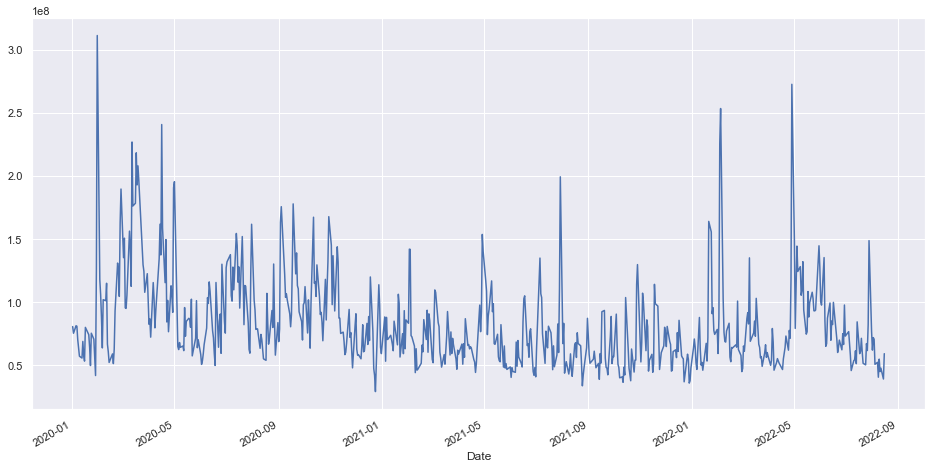

In [227]:
amazon['Volume'].plot(figsize=(16,8))

<h4>5.What was the moving average of various stocks?

In [228]:
amazon['Moving Avg']=amazon['Close'].rolling(30).mean()
amazon.dropna(inplace=True)
amazon

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moving Avg
Date,,,,,,,,
2020-02-13,107.249496,108.514000,107.099998,107.493500,60636000,0,0.0,97.311366
2020-02-14,107.783997,107.952003,106.294502,106.743500,52124000,0,0.0,97.706133
2020-02-18,106.250999,108.303497,106.205498,107.783501,58912000,0,0.0,98.173966
2020-02-19,108.389999,109.254997,108.056000,108.511002,51224000,0,0.0,98.619533
2020-02-20,108.653503,108.839500,106.372498,107.654999,62626000,0,0.0,99.029933
...,...,...,...,...,...,...,...,...
2022-08-10,142.899994,144.600006,141.009995,142.690002,54773800,0,0.0,122.275001
2022-08-11,143.860001,144.490005,139.759995,140.639999,44867300,0,0.0,123.332334
2022-08-12,142.050003,143.570007,140.119995,143.550003,47582800,0,0.0,124.577001


<AxesSubplot:xlabel='Date'>

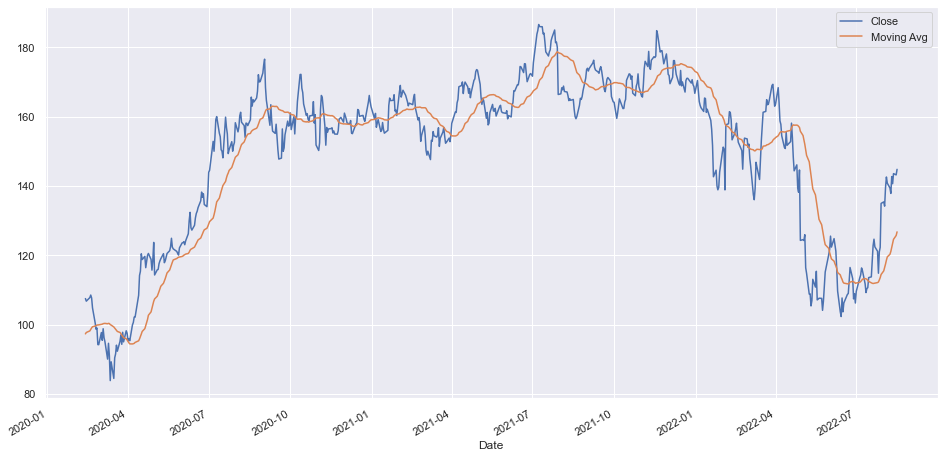

In [229]:
amazon[["Close","Moving Avg"]].plot(figsize=(16,8))

<h4>6.What was the daily return average of a stock?

In [230]:
amazon_daily_return_avg=amazon['Close'].pct_change().mean()
amazon_daily_return_avg

0.0007644860036067693

<h4>7.Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [231]:
amazon['Day_pct_change']=amazon['Close'].pct_change()*100
amazon.dropna(inplace=True)
amazon

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moving Avg,Day_pct_change
Date,,,,,,,,,
2020-02-14,107.783997,107.952003,106.294502,106.743500,52124000,0,0.0,97.706133,-0.697717
2020-02-18,106.250999,108.303497,106.205498,107.783501,58912000,0,0.0,98.173966,0.974299
2020-02-19,108.389999,109.254997,108.056000,108.511002,51224000,0,0.0,98.619533,0.674965
2020-02-20,108.653503,108.839500,106.372498,107.654999,62626000,0,0.0,99.029933,-0.788863
2020-02-21,107.107498,107.227501,104.400002,104.798500,92926000,0,0.0,99.369933,-2.653382
...,...,...,...,...,...,...,...,...,...
2022-08-10,142.899994,144.600006,141.009995,142.690002,54773800,0,0.0,122.275001,3.526083
2022-08-11,143.860001,144.490005,139.759995,140.639999,44867300,0,0.0,123.332334,-1.436683
2022-08-12,142.050003,143.570007,140.119995,143.550003,47582800,0,0.0,124.577001,2.069115


In [232]:
amazon["Trend"]= np.zeros(amazon["Day_pct_change"].count())
amazon["Trend"]= amazon["Day_pct_change"].apply(lambda x:trend(x))
amazon

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moving Avg,Day_pct_change,Trend
Date,,,,,,,,,,
2020-02-14,107.783997,107.952003,106.294502,106.743500,52124000,0,0.0,97.706133,-0.697717,Slight Negative
2020-02-18,106.250999,108.303497,106.205498,107.783501,58912000,0,0.0,98.173966,0.974299,Slight Positive
2020-02-19,108.389999,109.254997,108.056000,108.511002,51224000,0,0.0,98.619533,0.674965,Slight Positive
2020-02-20,108.653503,108.839500,106.372498,107.654999,62626000,0,0.0,99.029933,-0.788863,Slight Negative
2020-02-21,107.107498,107.227501,104.400002,104.798500,92926000,0,0.0,99.369933,-2.653382,Negative
...,...,...,...,...,...,...,...,...,...,...
2022-08-10,142.899994,144.600006,141.009995,142.690002,54773800,0,0.0,122.275001,3.526083,Among top gainers
2022-08-11,143.860001,144.490005,139.759995,140.639999,44867300,0,0.0,123.332334,-1.436683,Negative
2022-08-12,142.050003,143.570007,140.119995,143.550003,47582800,0,0.0,124.577001,2.069115,Positive


<h4>8.Visualize trend frequency through a Pie Chart.

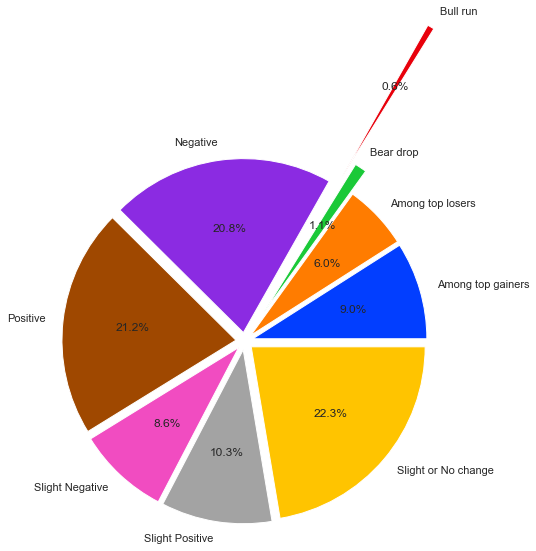

In [233]:
pie_data_amzn = amazon.groupby('Trend')
pie_label_amzn = sorted([i for i in amazon.loc[:, 'Trend'].unique()])
color=sns.color_palette('bright')
plt.pie(pie_data_amzn['Day_pct_change'].count(), labels = pie_label_amzn,colors=color,
        autopct = '%1.1f%%', explode=(0.1,0.1,0.4,2.2,0.1,0.1,0.1,0.1,0.1),radius = 2)
plt.show()

<h3>9.What was the correlation between the daily returns of different stocks?

In [238]:
!pip install --upgrade pandas-datareader
import pandas_datareader.data as web
import datetime

In [241]:
# set start and end dates 
start = datetime.datetime(2020,1, 2)
end = datetime.datetime(2022, 8, 17) 
# extract the closing price data
combined_df = web.DataReader(['AAPL', 'GOOG', 'MSFT','AMZN'],
'yahoo', start = start, end = end)['Close']
combined_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-02,75.087502,68.368500,160.619995,94.900497
2020-01-03,74.357498,68.032997,158.619995,93.748497
2020-01-06,74.949997,69.710503,159.029999,95.143997
2020-01-07,74.597504,69.667000,157.580002,95.343002
2020-01-08,75.797501,70.216003,160.089996,94.598503
...,...,...,...,...
2022-08-11,168.490005,119.820000,287.019989,140.639999
2022-08-12,172.100006,122.650002,291.910004,143.550003
2022-08-15,173.190002,122.879997,293.470001,143.179993


In [242]:
# drop null values
combined_df.dropna(inplace = True, axis = 0)

In [245]:
#Next we’ll analyse the correlation between the different stocks 
#in a pair-wise fashion with Seaborn pairplot.

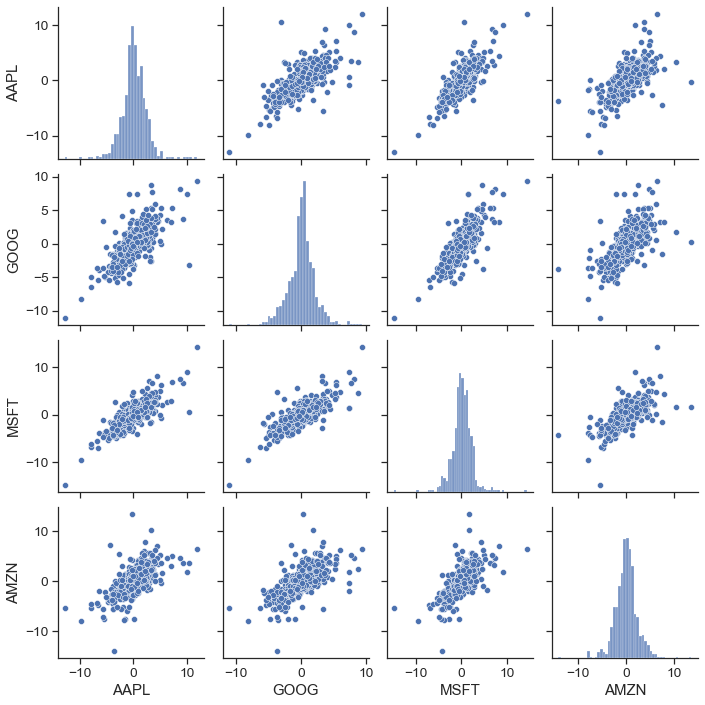

In [246]:
# store daily returns of all above stocks in a new dataframe 
pct_ch_df = combined_df.pct_change()*100
pct_ch_df.dropna(inplace = True, how = 'any', axis = 0)
# plotting pairplot  
import seaborn as sns
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(pct_ch_df)

<h3>---------------------------------THE END-------------------------------------